First, import the data

In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('../car_accident_dataset/car_accident_data/US_Accidents_Dec20.csv')
df = pd.read_csv('../../../../US_Accidents_Dec20.csv')

let's take a look at what's inside

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


We only want california!

In [4]:
# isolates the instances that is california
df = df[df["State"] == "CA"]

look at percentage of data that's missing

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                             	'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                                 column_name  percent_missing
ID                                        ID         0.000000
Crossing                            Crossing         0.000000
Give_Way                            Give_Way         0.000000
Junction                            Junction         0.000000
No_Exit                              No_Exit         0.000000
Railway                              Railway         0.000000
Roundabout                        Roundabout         0.000000
Station                              Station         0.000000
Country                              Country         0.000000
Stop                                    Stop         0.000000
State                                  State         0.000000
County                                County         0.000000
Traffic_Calming              Traffic_Calming         0.000000
Bump                                    Bump         0.000000
Side                                    Side         0.000000
Traffic_

In [6]:
# Drop columns that have a lot of the data missing
df.drop(['End_Lat', 'End_Lng', 'Number', 'Precipitation(in)', 'Wind_Chill(F)', 'TMC'], axis = 1, inplace=True)

# Drop columns that cannot be convert to numerical value or columns that are considered irrelevant 
df.drop(['ID', 'Source', 'Description', 'Street', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
        'Country', 'Timezone', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis = 1, inplace=True)

In [7]:
# remaining columns
print("Remaining columns: ", list(df))

Remaining columns:  ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset']


But wind direction is not numerical!

In [8]:
# mapping wind directions to numerical value

df.loc[(df['Wind_Direction'] == "North"), "Wind_Direction"] = 0
df.loc[(df['Wind_Direction'] == "N"), "Wind_Direction"] = 0
df.loc[(df['Wind_Direction'] == "NNE"), "Wind_Direction"] = 1
df.loc[(df['Wind_Direction'] == "NE"), "Wind_Direction"] = 2
df.loc[(df['Wind_Direction'] == "ENE"), "Wind_Direction"] = 3
df.loc[(df['Wind_Direction'] == "East"), "Wind_Direction"] = 4
df.loc[(df['Wind_Direction'] == "E"), "Wind_Direction"] = 4
df.loc[(df['Wind_Direction'] == "ESE"), "Wind_Direction"] = 5
df.loc[(df['Wind_Direction'] == "SE"), "Wind_Direction"] = 6
df.loc[(df['Wind_Direction'] == "SSE"), "Wind_Direction"] = 7
df.loc[(df['Wind_Direction'] == "South"), "Wind_Direction"] = 8
df.loc[(df['Wind_Direction'] == "S"), "Wind_Direction"] = 8
df.loc[(df['Wind_Direction'] == "SSW"), "Wind_Direction"] = 9
df.loc[(df['Wind_Direction'] == "SW"), "Wind_Direction"] = 10
df.loc[(df['Wind_Direction'] == "WSW"), "Wind_Direction"] = 11
df.loc[(df['Wind_Direction'] == "West"), "Wind_Direction"] = 12
df.loc[(df['Wind_Direction'] == "W"), "Wind_Direction"] = 12
df.loc[(df['Wind_Direction'] == "WNW"), "Wind_Direction"] = 13
df.loc[(df['Wind_Direction'] == "NW"), "Wind_Direction"] = 14
df.loc[(df['Wind_Direction'] == "NNW"), "Wind_Direction"] = 15
df.loc[(df['Wind_Direction'] == "CALM"), "Wind_Direction"] = 16
df.loc[(df['Wind_Direction'] == "Calm"), "Wind_Direction"] = 16
df.loc[(df['Wind_Direction'] == "Variable"), "Wind_Direction"] = 17
df.loc[(df['Wind_Direction'] == "VAR"), "Wind_Direction"] = 17

Also, we have "True" or "False" value that can be turned to a bool

In [9]:
# replace all boolean values by 0 and 1
df.replace(False, 0,inplace=True)
df.replace(True, 1, inplace=True)

In [10]:
# replace Day by 1 and Night by 0
df['Sunrise_Sunset'].replace('Day', 1, inplace=True)
df['Sunrise_Sunset'].replace('Night', 0, inplace=True)

In [11]:
# convert time 
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [12]:
# add duration in mins
df['duration_in_mins'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()/60

In [13]:
# add weekday, starts on Monday
df['weekday'] = df['Start_Time'].dt.weekday

In [14]:
# you can add as many cols relating to date as you like
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_of_week.html

In [15]:
# task 2: split up weather

# turning into binary classification
# making 69 more columns lmao

# and then maybe taking in some list from task 3 to drop some columns

In [16]:
# minimum number of entries to keep each weather condition
min_weather_entries = 500

# generate a list of possible weather conditions
w_conditions = df['Weather_Condition'].unique()

weather_conditions = []
for w_cond in w_conditions:
    if (len(df[df['Weather_Condition'] == w_cond]) >= min_weather_entries):
        weather_conditions.append(w_cond)

print(weather_conditions)

['Clear', 'Partly Cloudy', 'Haze', 'Mostly Cloudy', 'Overcast', 'Scattered Clouds', 'Light Rain', 'Mist', 'Smoke', 'Fog', 'Rain', 'Heavy Rain', 'Light Snow', 'Fair', 'Cloudy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy']


In [17]:
# create binary classifications
for w_cond in weather_conditions:
    df[w_cond] = df['Weather_Condition'] == w_cond
    df[w_cond] = df[w_cond].astype(float)
    print(f"{w_cond}: {len(df[df[w_cond] == 1.0])}")

Clear: 253061
Partly Cloudy: 80181
Haze: 31679
Mostly Cloudy: 86875
Overcast: 58469
Scattered Clouds: 29357
Light Rain: 31020
Mist: 556
Smoke: 5633
Fog: 10469
Rain: 10176
Heavy Rain: 3524
Light Snow: 643
Fair: 282753
Cloudy: 58189
Fair / Windy: 3199
Mostly Cloudy / Windy: 503
Partly Cloudy / Windy: 673


In [18]:
# task 3: weather stuff, do some data exploration, prove what to drop
# peter

In [19]:
# get a list of correlations with weather conditions
print(df.corr()['duration_in_mins'][weather_conditions])

Clear                   -0.000265
Partly Cloudy            0.000331
Haze                    -0.000885
Mostly Cloudy           -0.001791
Overcast                -0.002726
Scattered Clouds         0.000246
Light Rain              -0.002896
Mist                    -0.000500
Smoke                    0.001235
Fog                      0.000870
Rain                    -0.001630
Heavy Rain              -0.001231
Light Snow               0.000271
Fair                     0.005105
Cloudy                  -0.003204
Fair / Windy            -0.000399
Mostly Cloudy / Windy   -0.000674
Partly Cloudy / Windy    0.000232
Name: duration_in_mins, dtype: float64


<AxesSubplot:>

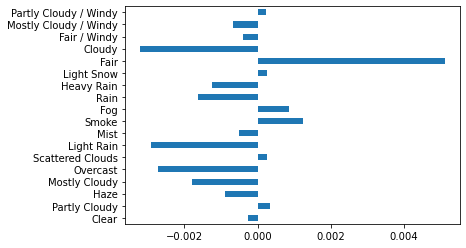

In [20]:
%matplotlib inline
# plot 
df.corr()['duration_in_mins'][weather_conditions].plot(kind='barh')

In [21]:
# Drop the rows where at least one element is missing.
data_len = len(df)
df = df.dropna()
print("dropped data: ", data_len - len(df))

dropped data:  150211


In [22]:
# remaining columns
print("Remaining columns: ", list(df))

Remaining columns:  ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'duration_in_mins', 'weekday', 'Clear', 'Partly Cloudy', 'Haze', 'Mostly Cloudy', 'Overcast', 'Scattered Clouds', 'Light Rain', 'Mist', 'Smoke', 'Fog', 'Rain', 'Heavy Rain', 'Light Snow', 'Fair', 'Cloudy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy']


## data exploration!

In [23]:
import seaborn as sns

<AxesSubplot:>

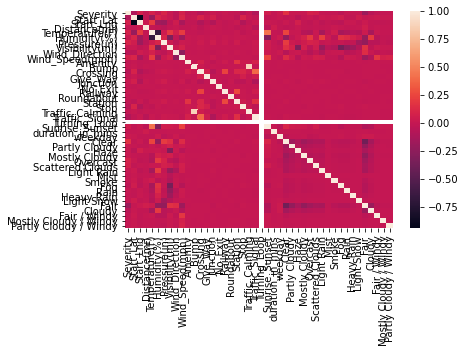

In [24]:
# heat map
sns.heatmap(df.corr(), xticklabels = True, yticklabels = True)

We see that Start_lat and start_long have a really high correlation; we should normalize it!
High correlation between bump and stop; we can get rid of one!

Let's do heat maps for each severity!

<AxesSubplot:>

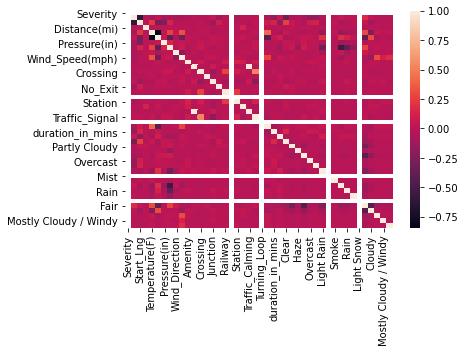

In [25]:
# severity 1 heat map

severity1 = df[df["Severity"]==1]
sns.heatmap(severity1.corr())

<AxesSubplot:>

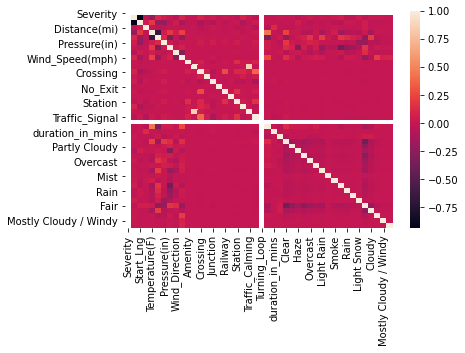

In [26]:
# severity 2 heat map

severity2 = df[df["Severity"]==2]
sns.heatmap(severity2.corr())

<AxesSubplot:>

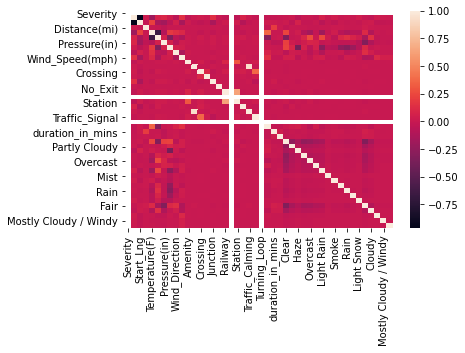

In [27]:
# severity 3 heat map

severity3 = df[df["Severity"]==3]
sns.heatmap(severity3.corr())

<AxesSubplot:>

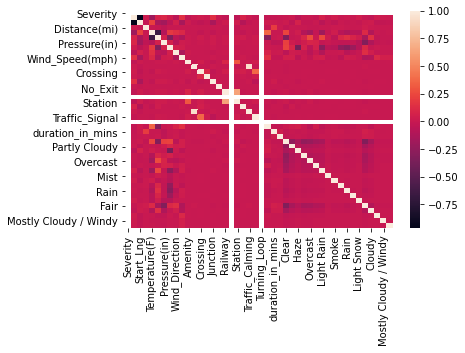

In [28]:
# severity 4 heat map

severity4 = df[df["Severity"]==3]
sns.heatmap(severity4.corr())

array([[<AxesSubplot:title={'center':'Severity'}>]], dtype=object)

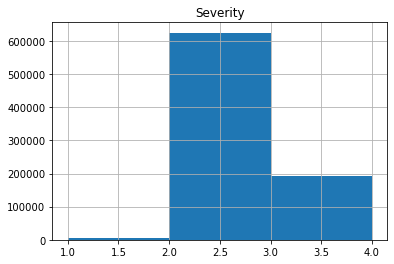

In [29]:
# what is the distribution of severity of accidents in CA?

df.hist("Severity", bins=[1,2,3,4])

We can see that majority of accidents are around 2

In [30]:
# lets see the percentages of the different severities

df["Severity"].value_counts(normalize=True)

# since we have so much severity 2, we want to normalize it by increasing other severity instances

# using sklearn

2    0.759831
3    0.224841
4    0.008520
1    0.006808
Name: Severity, dtype: float64

In [31]:
# we can try to get duration of crash (end - start)

# if we do severity is terms of a continous variable, then we want to linear

## Feature Selection

In [32]:
# we want 10 to 15 features

# principle component analysis and show why we're choosing these features
# reference: like the last 3/4th of the discusion in lect 7 lol

# erik, harjot, jackson

## Harjot's Feature Selection

### Turn Start_Time into a float that represents the time that the accident started

In [33]:
def get_time(row):
    return round(row['Start_Time'].hour + row['Start_Time'].minute / 60, 1)

df['Start_Time'] = df.apply(get_time, axis=1)

### Drop Weather_Condition column since it has already been encoded

In [34]:
df.drop(['Weather_Condition'], inplace=True, axis=1)

### Drop non-categorical features with low variance, since model won't learn anything if all data points are close to one another.

In [35]:
df.var()

Severity                      0.210472
Start_Time                   33.775291
Start_Lat                     4.268657
Start_Lng                     3.827593
Distance(mi)                  0.459376
Temperature(F)              171.677497
Humidity(%)                 563.844649
Pressure(in)                  0.408719
Visibility(mi)                5.875693
Wind_Direction               21.811381
Wind_Speed(mph)              32.510601
Amenity                       0.006167
Bump                          0.000266
Crossing                      0.033474
Give_Way                      0.000908
Junction                      0.115190
No_Exit                       0.000559
Railway                       0.010358
Roundabout                    0.000022
Station                       0.018939
Stop                          0.021516
Traffic_Calming               0.000350
Traffic_Signal                0.073995
Turning_Loop                  0.000000
Sunrise_Sunset                0.227775
duration_in_mins         

In [36]:
df.drop(['Pressure(in)', 'Distance(mi)'], axis=1, inplace=True)

### Drop features a user would not be able to determine, and redundant features

In [37]:
df.corr()

,Severity,Start_Time,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Amenity,...,Smoke,Fog,Rain,Heavy Rain,Light Snow,Fair,Cloudy,Fair / Windy,Mostly Cloudy / Windy,Partly Cloudy / Windy
Severity,1.000000,0.014207,-0.098452,0.072708,0.081705,0.014607,0.011947,-0.039431,0.070060,-0.009470,...,-0.007722,-0.036420,0.003296,-0.001437,-0.002266,-0.186054,-0.053115,-0.017941,-0.003714,-0.007506
Start_Time,0.014207,1.000000,-0.022307,0.023289,0.251185,-0.215838,0.112887,0.015442,0.177673,0.003721,...,-0.000364,-0.082968,-0.021309,-0.010615,-0.000055,-0.018134,-0.075292,0.008707,0.006020,0.005803
Start_Lat,-0.098452,-0.022307,1.000000,-0.939867,-0.198972,0.100538,0.019150,-0.050100,0.103604,0.006159,...,0.027576,0.045687,-0.014207,-0.021187,0.043563,0.002303,0.012543,0.023987,0.014379,0.010717
Start_Lng,0.072708,0.023289,-0.939867,1.000000,0.202642,-0.161977,-0.026163,0.043169,-0.122148,-0.016623,...,-0.030049,-0.038496,0.013404,0.017501,-0.009092,0.028818,-0.014607,-0.022230,-0.015729,-0.011184
Temperature(F),0.081705,0.251185,-0.198972,0.202642,1.000000,-0.652242,0.192528,0.072550,0.211277,-0.002789,...,0.052135,-0.134799,-0.091808,-0.053844,-0.068783,0.030390,-0.135514,0.010715,-0.002161,-0.001091
Humidity(%),0.014607,-0.215838,0.100538,-0.161977,-0.652242,1.000000,-0.325403,-0.020142,-0.169061,0.009488,...,-0.041521,0.165360,0.135410,0.080217,0.034832,-0.212975,0.198167,-0.059239,-0.007969,-0.017351
Visibility(mi),0.011947,0.112887,0.019150,-0.026163,0.192528,-0.325403,1.000000,0.029246,0.075934,0.004038,...,-0.083882,-0.363659,-0.237372,-0.179361,-0.068719,0.164937,-0.023802,0.023792,0.007653,0.014599
Wind_Direction,-0.039431,0.015442,-0.050100,0.043169,0.072550,-0.020142,0.029246,1.000000,-0.247681,0.006322,...,0.008969,0.021619,-0.065081,-0.031500,-0.002038,0.138785,0.009698,-0.025567,-0.007217,-0.011665
Wind_Speed(mph),0.070060,0.177673,0.103604,-0.122148,0.211277,-0.169061,0.075934,-0.247681,1.000000,0.001263,...,-0.015167,-0.073605,0.035948,0.025774,0.003859,-0.181041,-0.081954,0.188324,0.073409,0.086322
Amenity,-0.009470,0.003721,0.006159,-0.016623,-0.002789,0.009488,0.004038,0.006322,0.001263,1.000000,...,0.000048,-0.000895,-0.001879,-0.000604,0.000830,-0.003988,0.000181,0.000136,0.000564,-0.000072


In [38]:
# Features that are highly correlated with other features
df.drop(['End_Time', 'Weather_Timestamp', 'Start_Lng', 'Turning_Loop'], axis=1, inplace=True)

In [39]:
# Weather conditions is redundant since temperature, precipitation, etc. capture it
df.drop(weather_conditions, axis=1, inplace=True)

### Drop outliers (collisions lasting longer than 360 minutes) in duration of collision 

array([[<AxesSubplot:title={'center':'duration_in_mins'}>]], dtype=object)

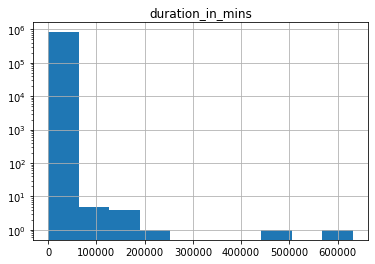

In [53]:
pd.DataFrame.hist(df, column=['duration_in_mins'], log=True)

In [54]:
df = df[df['duration_in_mins'] <= 360]
print(f'Size after drop {df.shape[0]}')

Size after drop 807565


array([[<AxesSubplot:title={'center':'duration_in_mins'}>]], dtype=object)

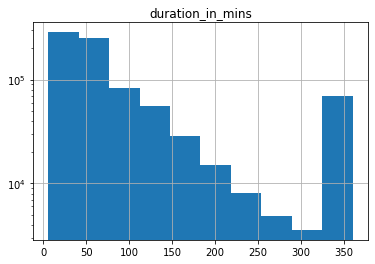

In [56]:
pd.DataFrame.hist(df, column=['duration_in_mins'], log=True)

### One Hot Encode weekday, wind direction, and severity

In [57]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()
OHE_features = OHE.fit_transform(df[['weekday', 'Wind_Direction', 'Severity']])

In [58]:
OHE_features_df = pd.DataFrame.sparse.from_spmatrix(OHE_features, columns=OHE.get_feature_names())

In [59]:
df.drop(['weekday', 'Wind_Direction', 'Severity'], inplace=True, axis=1)
df = pd.concat([df.reset_index(drop=True), OHE_features_df.reset_index(drop=True)], axis=1)

### Standard Scaler on continuous inputs

In [60]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Start_Time', 'Start_Lat', 'Temperature(F)', 'Humidity(%)', 
                      'Visibility(mi)', 'Wind_Speed(mph)']
# Do the scaling and create a DF for the scaled features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features)

# Drop the old columns in X and add the new scaled ones
df.drop(numerical_features, inplace=True, axis=1)
df = pd.concat([scaled_features_df, df], axis=1)

### Drop outliers

In [61]:
# This takes roughly 3 minutes (on Harjot's machine)
from sklearn.ensemble import IsolationForest
detector = IsolationForest(n_jobs=-1)
outliers = detector.fit_predict(df)

C:\Users\Harjot Singh\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Harjot Singh\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [62]:
import numpy as np
df.reset_index(drop=True,inplace=True)

if_outcome = np.where(outliers == -1)
print(f'Size before drop {df.shape[0]}')
df.drop(if_outcome[0], inplace=True)
print(f'Size after drop {df.shape[0]}')

Size before drop 807565
Size after drop 801775


### Split DF into X (independent variables) and Y (dependent) variables

In [63]:
X = df.drop(['duration_in_mins'], axis=1)
Y = df['duration_in_mins']

In [64]:
X.reset_index(inplace=True, drop=True)

### Create a 70:30 train test split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Create RandomForestRegressor to get best features

In [66]:
from sklearn.ensemble import RandomForestRegressor

# This takes roughly 3 minutes on Harjot's machine
rfr = RandomForestRegressor(n_estimators=15)
rfr.fit(X_train, Y_train)

C:\Users\Harjot Singh\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestRegressor(n_estimators=15)

In [67]:
# Get feature importance DF
pd.DataFrame(rfr.feature_importances_, index=X_train.columns).sort_values(by=[0], ascending=False)

,0
Start_Lat,0.225072
Start_Time,0.151955
Temperature(F),0.116248
Humidity(%),0.115765
Wind_Speed(mph),0.098707
x2_3,0.036617
Visibility(mi),0.026233
x0_2,0.012922
x0_3,0.012911
x0_4,0.012555


In [68]:
# Extract the five best features
top_5 = ['Start_Lat', 'Start_Time', 'Humidity(%)', 'Temperature(F)', 'Wind_Speed(mph)']
X = df[top_5]

### Recreate the 70:30 train test split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Create Keras model

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dropout(0.5)) dropout layer prevents overfitting but the model doesnt overfit to begin with
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [71]:
# from tensorflow.keras.optimizers import Adam
# opt = Adam(lr=0.1)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [78]:
# DONT RUN ABOVE CELLS UNLESS YOU'RE CREATING A NEW MODEL (e.g: adding layers, neurons, etc.)
# Load the already trained weights
model = keras.models.load_model('accidents_model')

In [73]:
model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
28063/28063 [==============================] - 54s 2ms/step - loss: 9096.2783 - mse: 9096.2783 - val_loss: 9001.8184 - val_mse: 9001.8184
Epoch 2/50
28063/28063 [==============================] - 50s 2ms/step - loss: 8985.5684 - mse: 8985.5684 - val_loss: 9005.8760 - val_mse: 9005.8760
Epoch 3/50
28063/28063 [==============================] - 50s 2ms/step - loss: 8972.4639 - mse: 8972.4639 - val_loss: 8992.1367 - val_mse: 8992.1367
Epoch 4/50
28063/28063 [==============================] - 49s 2ms/step - loss: 8963.6738 - mse: 8963.6738 - val_loss: 8982.4756 - val_mse: 8982.4756
Epoch 5/50
28063/28063 [==============================] - 48s 2ms/step - loss: 8958.3467 - mse: 8958.3467 - val_loss: 8991.5283 - val_mse: 8991.5283
Epoch 6/50
28063/28063 [==============================] - 48s 2ms/step - loss: 8949.8145 - mse: 8949.8145 - val_loss: 8974.8359 - val_mse: 8974.8359
Epoch 7/50
28063/28063 [==============================] - 48s 2ms/step - loss: 8947.7031 - mse: 8947.7031 

In [74]:
# save the weights for the model
model.save('accidents_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: accidents_model\assets


In [79]:
model.evaluate(X_test, Y_test)

7517/7517 [==============================] - 4s 580us/step - loss: 8828.9834 - mean_squared_error: 8828.9834


[8828.9833984375, 8828.9833984375]

In [86]:
for i in range(len(X_test)):
    row = np.array(X_test.iloc[i,:]).reshape(1,-1)
    predicted = model.predict(row)
    print(f'Predicted: {predicted}, Actual: {Y_test.iloc[i]}, Diff {predicted-Y_test.iloc[i]}')

Predicted: [[104.74476]], Actual: 44.65, Diff [[60.094757]]
Predicted: [[111.333336]], Actual: 29.7, Diff [[81.63333]]
Predicted: [[97.27646]], Actual: 30.0, Diff [[67.27646]]
Predicted: [[92.49958]], Actual: 72.25, Diff [[20.24958]]
Predicted: [[107.29011]], Actual: 202.18333333333334, Diff [[-94.89323]]
Predicted: [[86.47318]], Actual: 211.51666666666668, Diff [[-125.04348]]
Predicted: [[84.461586]], Actual: 32.550000000000004, Diff [[51.911587]]
Predicted: [[95.297455]], Actual: 31.600000000000005, Diff [[63.697456]]
Predicted: [[73.1047]], Actual: 131.93333333333334, Diff [[-58.828636]]
Predicted: [[88.13944]], Actual: 29.85, Diff [[58.289444]]
Predicted: [[98.56193]], Actual: 151.61666666666667, Diff [[-53.05474]]
Predicted: [[100.75653]], Actual: 74.46666666666667, Diff [[26.289864]]
Predicted: [[91.05771]], Actual: 87.15, Diff [[3.9077072]]
Predicted: [[88.90697]], Actual: 119.73333333333333, Diff [[-30.826363]]
Predicted: [[94.66638]], Actual: 101.51666666666667, Diff [[-6.8502

Predicted: [[116.50994]], Actual: 99.11666666666666, Diff [[17.393272]]
Predicted: [[96.34027]], Actual: 28.616666666666667, Diff [[67.7236]]
Predicted: [[87.11549]], Actual: 15.0, Diff [[72.11549]]
Predicted: [[84.88091]], Actual: 360.0, Diff [[-275.11908]]
Predicted: [[92.45544]], Actual: 44.483333333333334, Diff [[47.972103]]
Predicted: [[72.2679]], Actual: 44.71666666666667, Diff [[27.551231]]
Predicted: [[104.55108]], Actual: 153.5, Diff [[-48.94892]]
Predicted: [[95.56676]], Actual: 29.85, Diff [[65.71676]]
Predicted: [[94.55342]], Actual: 59.833333333333336, Diff [[34.72009]]
Predicted: [[96.9227]], Actual: 29.466666666666665, Diff [[67.45603]]
Predicted: [[88.8352]], Actual: 55.6, Diff [[33.2352]]
Predicted: [[69.84338]], Actual: 122.56666666666668, Diff [[-52.72328]]
Predicted: [[89.80387]], Actual: 351.0, Diff [[-261.19614]]
Predicted: [[88.07386]], Actual: 29.383333333333333, Diff [[58.69053]]
Predicted: [[87.880516]], Actual: 44.733333333333334, Diff [[43.147182]]
Predicted

Predicted: [[82.131485]], Actual: 29.816666666666666, Diff [[52.31482]]
Predicted: [[95.09405]], Actual: 29.666666666666668, Diff [[65.42738]]
Predicted: [[96.51404]], Actual: 54.583333333333336, Diff [[41.930706]]
Predicted: [[68.60478]], Actual: 31.750000000000004, Diff [[36.854782]]
Predicted: [[58.01284]], Actual: 44.583333333333336, Diff [[13.429508]]
Predicted: [[93.89277]], Actual: 44.68333333333333, Diff [[49.209435]]
Predicted: [[93.275406]], Actual: 114.9, Diff [[-21.624596]]
Predicted: [[93.09463]], Actual: 29.933333333333334, Diff [[63.161293]]
Predicted: [[98.285576]], Actual: 29.783333333333335, Diff [[68.50224]]
Predicted: [[93.44588]], Actual: 73.41666666666667, Diff [[20.029213]]
Predicted: [[124.469536]], Actual: 165.01666666666668, Diff [[-40.547127]]
Predicted: [[73.71509]], Actual: 29.766666666666666, Diff [[43.94842]]
Predicted: [[91.11999]], Actual: 149.5, Diff [[-58.380013]]
Predicted: [[89.176926]], Actual: 44.5, Diff [[44.676926]]
Predicted: [[87.871994]], Act

KeyboardInterrupt: 

## Model creation

In [ ]:
# linear regression model

# list of features here

# use sklearn

# sklearn cross val score? reports back the accuracy :0

# output: duration
# input: using user's location (both automatic OR manual)
#        using an geography API
#        going to depend on what features we want to work with
#        two models?? or use a mean or make default values

# steph and amaan?

In [ ]:
# if we want, we can do other models (log) and show their accuracy

In [ ]:
# tasks 1: april 28th (cell 8)
# taks 2-3: april 29th (cell 9-10)
# extend feature selection: april 30th (cell 21)
# shorten model creation: may 3rd (cell 22)